<H1>K-means clustering (KMC) algorithm </H1>

<P>
Given a set $X$ of $n$ observations; $X = \{x_1, x_2, \cdots, x_n\}$, where every $i$ observation is a vector of measurements ($x_i \in R^d$). The K-means clustering aims to classify the observations into a set of $k$ clusters $C =\{c_1, c_2, \cdots, c_k\}$ that minimizes the following expression:
</P>

$
\displaystyle{\operatorname{arg\,min}}  \sum_{\mathbf x \in C_i} \left\| \mathbf x - \boldsymbol\mu_i \right\|^2
$

In [1]:
%pylab inline
import matplotlib 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
from scipy.spatial import distance

Populating the interactive namespace from numpy and matplotlib


Consider the following data set consisting of the scores of two variables on each of 17 experiments

In [2]:
x = np.loadtxt("data.txt", comments='//')
x.shape
print(x.shape)

(17, 2)


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


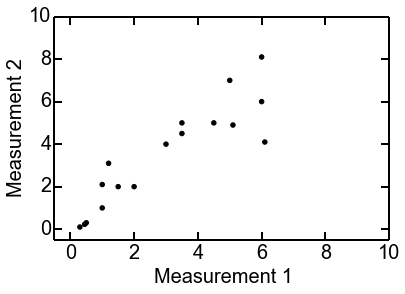

In [3]:
# Plot 2 measurements
#for i in x:
#    plt.plot(i[0],i[1], 'ko');
plt.scatter(x[:,0], x[:,1], color='black')
plt.xlim(-0.5, 10);
plt.ylim(-0.5, 10);
plt.xlabel('Measurement 1');
plt.ylabel('Measurement 2');

This data set is to be grouped into two clusters. 
As a first step in finding a sensible initial partition, let the values of the measurements 1 and 2 of the two individuals 

In [4]:
centroid1 = x[0] # first experiment 
centroid2 = x[3] # fourth experiment
print(centroid1, centroid2)

(array([ 1.,  1.]), array([ 5.,  7.]))


In [5]:
# calculate Euclidean distances from centroid 1
sample1= list()
for i, obs in enumerate(x):
    dist = distance.euclidean(obs, centroid1)
    sample1.append(dist)
    print("%2d -> %6f" %(i, dist))

 0 -> 0.000000
 1 -> 1.118034
 2 -> 3.605551
 3 -> 7.211103
 4 -> 4.716991
 5 -> 5.315073
 6 -> 4.301163
 7 -> 0.860233
 8 -> 0.946256
 9 -> 1.140175
10 -> 8.683893
11 -> 1.414214
12 -> 7.071068
13 -> 5.658622
14 -> 5.968249
15 -> 1.100000
16 -> 2.109502


In [6]:
# calculate Euclidean distances from centroid 2
sample2 = list()
for i, obs in enumerate(x):
    dist = distance.euclidean(obs, centroid2)
    sample2.append(dist)
    print("%2d -> %6f" %(i, dist))

 0 -> 7.211103
 1 -> 6.103278
 2 -> 3.605551
 3 -> 0.000000
 4 -> 2.500000
 5 -> 2.061553
 6 -> 2.915476
 7 -> 8.070936
 8 -> 8.156923
 9 -> 8.348653
10 -> 1.486607
11 -> 5.830952
12 -> 1.414214
13 -> 2.102380
14 -> 3.101612
15 -> 6.325346
16 -> 5.445181


In [7]:
group1 = x[np.array(sample1)<=np.array(sample2)]
print(group1)

[[ 1.    1.  ]
 [ 1.5   2.  ]
 [ 3.    4.  ]
 [ 0.5   0.3 ]
 [ 0.45  0.23]
 [ 0.3   0.1 ]
 [ 2.    2.  ]
 [ 1.    2.1 ]
 [ 1.2   3.1 ]]


In [8]:
group2 = x[np.array(sample2)<np.array(sample1)]
print(group2)

[[ 5.   7. ]
 [ 3.5  5. ]
 [ 4.5  5. ]
 [ 3.5  4.5]
 [ 6.   8.1]
 [ 6.   6. ]
 [ 5.1  4.9]
 [ 6.1  4.1]]


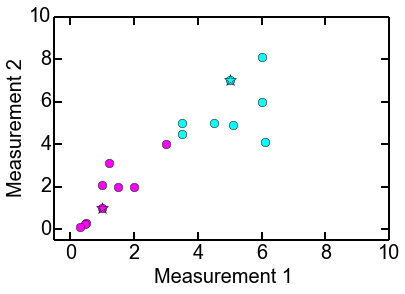

In [9]:
# Replot first categorization
# Plot 2 measurements
for i in group1:
    plt.plot(i[0],i[1], 'o',color='magenta');
for i in group2:
    plt.plot(i[0],i[1], 'o', color='cyan');
plt.plot(centroid1[0], centroid1[1], '*', color='magenta', ms=12)
plt.plot(centroid2[0], centroid2[1], '*', color='cyan', ms=12)
plt.xlim(-0.5, 10);
plt.ylim(-0.5, 10);
plt.xlabel('Measurement 1');
plt.ylabel('Measurement 2');

In [10]:
# recalculate centroids
centroid1 = np.average(group1, axis=0)
centroid2 = np.average(group2, axis=0)
print(centroid1, centroid2)

(array([ 1.21666667,  1.64777778]), array([ 4.9625,  5.575 ]))


In [11]:
# calculate Euclidean distances from new centroid 1
sample1= list()
for i, obs in enumerate(x):
    dist = distance.euclidean(obs, centroid1)
    sample1.append(dist)
    print("%2d -> %6f" %(i, dist))

 0 -> 0.683052
 1 -> 0.452038
 2 -> 2.951818
 3 -> 6.554380
 4 -> 4.055984
 5 -> 4.692299
 6 -> 3.653599
 7 -> 1.526472
 8 -> 1.611791
 9 -> 1.798859
10 -> 8.031902
11 -> 0.858878
12 -> 6.467002
13 -> 5.065296
14 -> 5.464461
15 -> 0.501447
16 -> 1.452318


In [12]:
sample2= list()
for i, obs in enumerate(x):
    dist = distance.euclidean(obs, centroid2)
    sample2.append(dist)
    print("%2d -> %6f" %(i, dist))

 0 -> 6.052440
 1 -> 4.976900
 2 -> 2.516353
 3 -> 1.425493
 4 -> 1.571474
 5 -> 0.737924
 6 -> 1.815084
 7 -> 6.909380
 8 -> 6.995118
 9 -> 7.191282
10 -> 2.729841
11 -> 4.642955
12 -> 1.121174
13 -> 0.688862
14 -> 1.862668
15 -> 5.270392
16 -> 4.503558


In [13]:
# reasign the groups
group1 = x[np.array(sample1)<=np.array(sample2)]
print(group1)


[[ 1.    1.  ]
 [ 1.5   2.  ]
 [ 0.5   0.3 ]
 [ 0.45  0.23]
 [ 0.3   0.1 ]
 [ 2.    2.  ]
 [ 1.    2.1 ]
 [ 1.2   3.1 ]]


In [14]:
group2 = x[np.array(sample2)<np.array(sample1)]
print(group2)

[[ 3.   4. ]
 [ 5.   7. ]
 [ 3.5  5. ]
 [ 4.5  5. ]
 [ 3.5  4.5]
 [ 6.   8.1]
 [ 6.   6. ]
 [ 5.1  4.9]
 [ 6.1  4.1]]


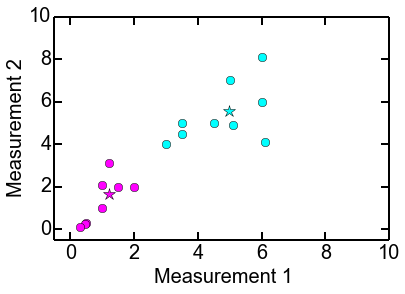

In [15]:
# Replot first categorization with new centrodis
# Plot 2 measurements
for i in group1:
    plt.plot(i[0],i[1], 'o', color='magenta');
for i in group2:
    plt.plot(i[0],i[1], 'o', color='cyan');
plt.plot(centroid1[0], centroid1[1], '*', color='magenta', ms=12)
plt.plot(centroid2[0], centroid2[1], '*', color='cyan', ms=12)
plt.xlim(-0.5, 10);
plt.ylim(-0.5, 10);
plt.xlabel('Measurement 1');
plt.ylabel('Measurement 2');

In [16]:
# recalculate centroids
centroid1 = np.average(group1, axis=0)
centroid2 = np.average(group2, axis=0)
print(centroid1, centroid2)

(array([ 0.99375,  1.35375]), array([ 4.74444444,  5.4       ]))


In [17]:
# calculate Euclidean distances from new centroid 1
sample1= list()
for i, obs in enumerate(x):
    dist = distance.euclidean(obs, centroid1)
    sample1.append(dist)

# calculate Euclidean distances from centroid 2
sample2 = list()
for i, obs in enumerate(x):
    dist = distance.euclidean(obs, centroid2)
    sample2.append(dist)

# reasign the groups
group1 = x[np.array(sample1)<=np.array(sample2)]

group2 = x[np.array(sample2)<np.array(sample1)]


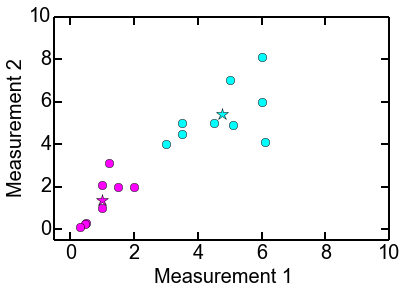

In [18]:
# Replot first categorization with new centrodis
# Plot 2 measurements
for i in group1:
    plt.plot(i[0],i[1], 'o', color='magenta');
for i in group2:
    plt.plot(i[0],i[1], 'o', color='cyan');
plt.plot(centroid1[0], centroid1[1], '*', color='magenta', ms=12)
plt.plot(centroid2[0], centroid2[1], '*', color='cyan', ms=12)
plt.xlim(-0.5, 10);
plt.ylim(-0.5, 10);
plt.xlabel('Measurement 1');
plt.ylabel('Measurement 2');

In [19]:
# recalculate centroids
centroid1 = np.average(group1, axis=0)
centroid2 = np.average(group2, axis=0)
print(centroid1, centroid2)

(array([ 0.99375,  1.35375]), array([ 4.74444444,  5.4       ]))
